#Processing for skewed data
Feature Selection via Shapley Values
Training Decision Tree Classifier
Training Vanilla NN
Training Multiple experts systems

# Processing for data after outlier removal and Imputation
Feature Selection via Shapley Values
Training Decision Tree Classifier
Training Vanilla NN
Training Multiple experts systems

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 7.6MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491638 sha256=dd4e42f85ecc0d6a25525a7c60e3b608ba745931accc26f3c124e69c66dae9ac
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import collections
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import shap
from sklearn.metrics import mean_squared_error

%matplotlib inline
# import os
# os.listdir()

In [ ]:
df=pd.read_csv('complete_data.csv')
df.head()

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,url*peace+images,url*blipverts,url*tkaine+kats,url*labyrinth,url*advertising+blipverts,url*images+oso,url*area51+corridor,url*ran+gifs,url*express-scripts.com,url*off,url*cnet,url*time+1998,url*josefina3,url*truluck.com,url*clawnext+gif,url*autopen.com,url*tvgen.com,url*pixs,url*heartland+5309,url*meadows+9196,url*blue,url*ad+gif,url*area51,url*www.internauts.ca,url*afn.org,url*ran.org,url*shareware.com,url*baons+images,url*area51+labyrinth,url*pics,...,alt*to+visit,alt*rank+my,alt*from,alt*page,alt*graphic,alt*like+mine,alt*email+me,alt*visit,alt*free,alt*the+kat,alt*award,alt*services,alt*about,alt*for,alt*here+to,alt*network,alt*you,alt*logo,alt*home,alt*kat,caption*and,caption*home+page,caption*click+here,caption*the,caption*pratchett,caption*here+for,caption*site,caption*page,caption*to,caption*of,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,output_nonad
0,0.194053,0.194053,0.016642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.087637,0.730829,0.136820,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.050078,0.358372,0.116138,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.092332,0.730829,0.129978,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.092332,0.730829,0.129978,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#SHAPLEY
y=df['output_nonad']
X=df.drop('output_nonad', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

shap.initjs()
xgb_model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001, random_state=0)
xgb_model.fit(X_train, y_train)

y_predict = xgb_model.predict(X_test)
mean_squared_error(y_test, y_predict)**(0.5)

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer(X_train)
print(shap_values)



[10:39:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

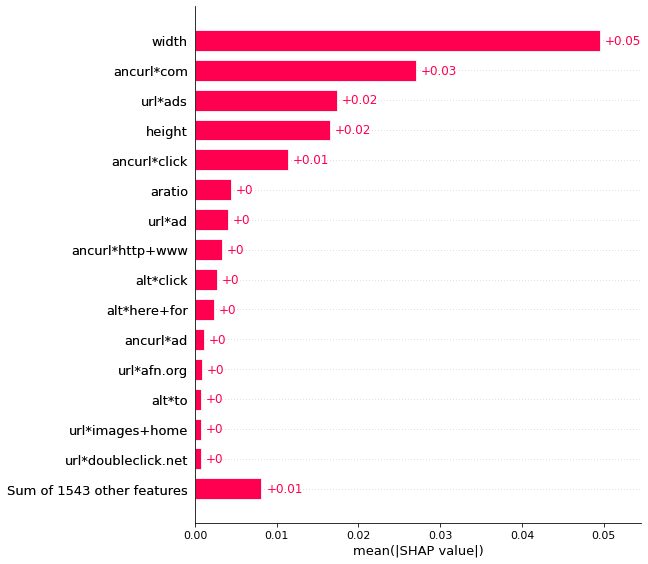

In [ ]:
shap.plots.bar(shap_values,max_display=16)

In [ ]:
cols=['width','ancurl*com','url*ads','height','ancurl*click','aratio','url*ad','ancurl*http+www','alt*click','alt*here+for','ancurl*ad','url*afn.org','alt*to','url*images+home','url*doubleclick.net','output_nonad']
cols_X=['width','ancurl*com','url*ads','height','ancurl*click','aratio','url*ad','ancurl*http+www','alt*click','alt*here+for','ancurl*ad','url*afn.org','alt*to','url*images+home','url*doubleclick.net']
datapd=df[['width','url*ads','height','ancurl*click','aratio','url*ad','ancurl*http+www','alt*here+for','ancurl*ad','url*afn.org','alt*to','url*images+home','output_nonad']]
# fig,ax=plt.subplots(nrows=1,ncols=3)
# fig.set_figheight(5)
# fig.set_figwidth(25)



# sns.distplot(datapd['aratio'],ax=ax[0])
# sns.distplot(datapd['height'],ax=ax[1])
# sns.distplot(datapd['width'],ax=ax[2])


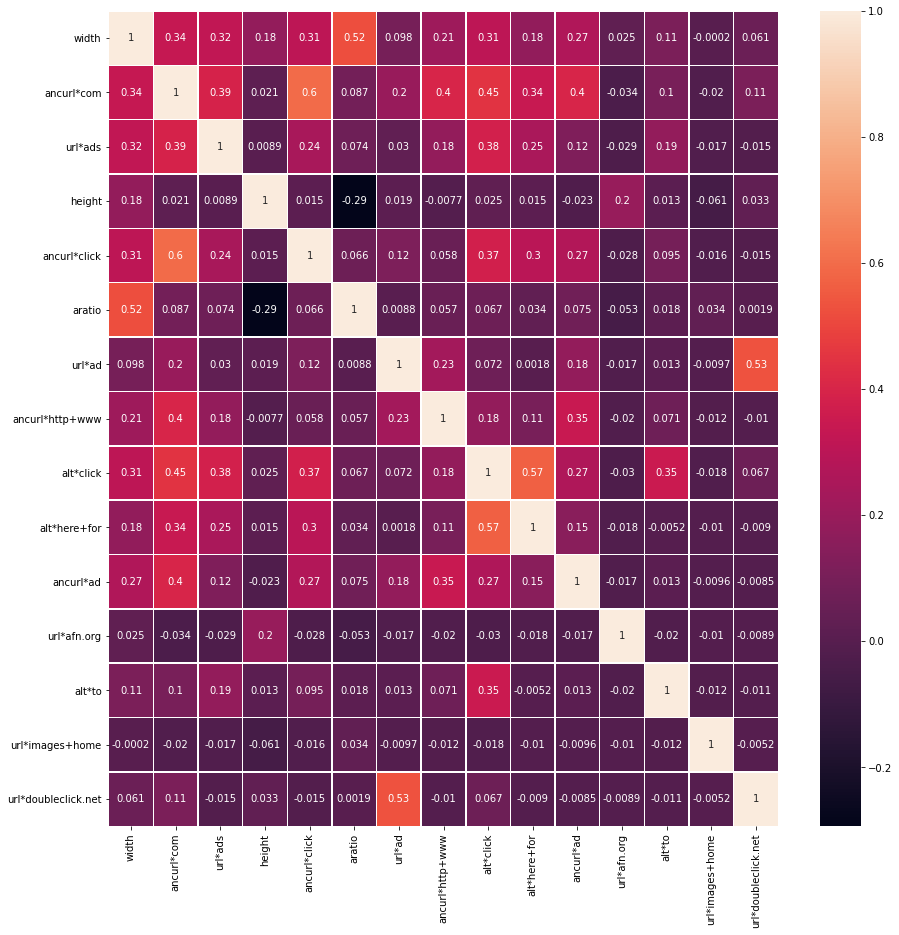

In [ ]:
columns_for_visualization = list()
columns_for_visualization=cols_X
corr=datapd[columns_for_visualization].corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True,linewidths=.5, ax=ax)

In [ ]:
da=datapd.values
X=da[:,:-1]
y=da[:,-1]


xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=80)

In [ ]:

def fit_models(classifiers,xtrain,ytrain):
    """This function fit multiple models by sklearn and return the dictionary with values as  objects of models"""
    models=collections.OrderedDict()
    for constructor in classifiers:
        obj=constructor()
        obj.fit(xtrain,ytrain)
        models[str(constructor).split(':')[0]]=obj
    return models

def classification_multi_report(ytest,models_array):
    """This function generate classification accuracy report for given input model objects"""
    for i in models_array:
        print('__________________________________________________')
        print('the model - '+str(i))
        print(classification_report(ytest,models_array[i].predict(xtest)))
def cross_Fucntion(models,cv):
    """This function return cross validated accuray and the variance of given input model obejects"""
    accuracy={}
    for model in models:
        cross_val_array=cross_val_score(models[model],xtrain,ytrain,scoring='accuracy',cv=cv)
        accuracy[model]=[np.mean(cross_val_array),np.std(cross_val_array)]
    return accuracy

def multi_grid_search(param_grid_array,estimator_list,x,y):
    """This function calculate the grid search parameters and accuracy  for given input modles and return dictionary with each tupple containing accuracy and best parameters"""
    d={}
    count=0
    for i in estimator_list:
        gc=GridSearchCV(estimator=estimator_list[i],param_grid=param_grid_array[count],scoring ='accuracy',cv=5).fit(x,y)
        d[i]=(gc.best_params_,gc.best_score_)
        count+=1
    return d

## Classification  Report

>The classification report visualizer displays the precision, recall, F1, and support scores for the model. ... Visual classification reports are used to compare classification models to select models that are “redder”, e.g. have stronger classification metrics or that are more balanced.

In [ ]:
classifiers=[ SVC,KNeighborsClassifier, RandomForestClassifier, GradientBoostingClassifier,LogisticRegression,XGBClassifier,DecisionTreeClassifier]
# classifiers=[DecisionTreeClassifier]

model_list=fit_models(classifiers,xtrain,ytrain)

classification_multi_report(ytest,model_list)

__________________________________________________
the model - <class 'sklearn.svm._classes.SVC'>
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89       133
         1.0       0.98      0.99      0.98       851

    accuracy                           0.97       984
   macro avg       0.95      0.92      0.93       984
weighted avg       0.97      0.97      0.97       984

__________________________________________________
the model - <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       133
         1.0       0.98      0.99      0.98       851

    accuracy                           0.97       984
   macro avg       0.94      0.93      0.94       984
weighted avg       0.97      0.97      0.97       984

__________________________________________________
the model - <class 'sklearn.ensemble._forest.RandomForestClassifier'>

In [ ]:
obj=cross_Fucntion(model_list,cv=20)
for model in obj:
    print('the model -'+str(model)+'has \n || crosss validated accuracy as  -> '+str(obj[model][0])+' | variance - '+str(obj[model][1])+' ||' )
    print('______________________________________________________________________________________________________________')

the model -<class 'sklearn.tree._classes.DecisionTreeClassifier'>has 
 || crosss validated accuracy as  -> 0.959900839054157 | variance - 0.01773210287928983 ||
______________________________________________________________________________________________________________


In [ ]:

param_grid_svm=[
    {
        'kernel':['linear'],'random_state':[0]
    },
     {
        'kernel':['rbf'],'random_state':[0]
     },
    
    {
        'kernel':['poly'],'degree':[1,2,3,4],'random_state':[0]
    }
]

param_grid_knn=[

    {   
        'n_neighbors':[1,5,11,15,20,25],
        'p':[2]
        
    }
]

param_grid_nb=[
    {}
]
#RandomF SVC,KNeighborsClassifier, RandomForestClassifier, GradientBoostingClassifier,LogisticRegressio,XGB

param_grid_rf=[
               {
                   'n_estimators': np.arange(100, 1000, 100),
                  # 'max_depth' : np.arange(5, 100,5)
               }
]

param_grid_xgb=[
               {
                   'n_estimators': np.arange(100,500, 100)
                  
               }
]

param_grid_lr=[
              {}
]
param_grid_xgbx=[
               {
                   'n_estimators': np.arange(100,500, 100)
                  
               }
]

param_grid_array=[param_grid_svm,param_grid_knn,param_grid_rf,param_grid_xgb,param_grid_lr,param_grid_xgbx]
multi_grid_search(param_grid_array,model_list,xtrain,ytrain)

### Fitting model with best hyperparmater and cv score

In [ ]:
classifier=RandomForestClassifier(n_estimators=800)

In [ ]:
classifier.fit(xtrain,ytrain)


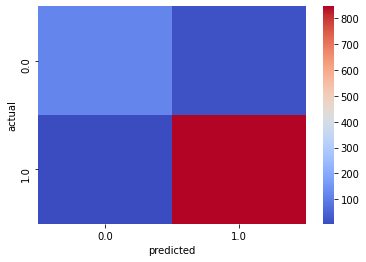

In [ ]:
sns.heatmap(pd.crosstab(ytest,classifier.predict(xtest)),cmap='coolwarm')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
#custom NN
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop,Adam


In [ ]:
print(X.shape)

(3279, 15)


In [ ]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.125, random_state=1)

In [ ]:
model=Sequential() 
model.add(Dense(25,activation='relu',input_shape=(15,),kernel_initializer='he_normal'))
model.add(Dense(20,activation='sigmoid'))
# model.add(Dense(20,activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(20,activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(15,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dropout(0.2))

# model.add(Dropout(0.2))
# model.add(Dense(90,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(60,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(30,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
# model.add(DropOut(0.2))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 25)                400       
_________________________________________________________________
dense_8 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 6         
Total params: 1,031
Trainable params: 1,031
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(X_train.shape)

(2874, 4)


In [ ]:

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy','AUC'])
class_w={0.0:8,1.0:1}

history = model.fit(X_train1, y_train1,class_weight=class_w,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_val, y_val))


Epoch 1/100
82/82 [==============================] - 1s 6ms/step - loss: 0.3373 - accuracy: 0.9700 - auc: 0.9747 - val_loss: 0.1642 - val_accuracy: 0.9756 - val_auc: 0.9679
Epoch 2/100
82/82 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.9696 - auc: 0.9672 - val_loss: 0.1568 - val_accuracy: 0.9756 - val_auc: 0.9667
Epoch 3/100
82/82 [==============================] - 0s 3ms/step - loss: 0.3254 - accuracy: 0.9725 - auc: 0.9777 - val_loss: 0.1608 - val_accuracy: 0.9756 - val_auc: 0.9678
Epoch 4/100
82/82 [==============================] - 0s 3ms/step - loss: 0.3027 - accuracy: 0.9759 - auc: 0.9785 - val_loss: 0.1721 - val_accuracy: 0.9726 - val_auc: 0.9677
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.9714 - auc: 0.9748 - val_loss: 0.1588 - val_accuracy: 0.9756 - val_auc: 0.9674
Epoch 6/100
82/82 [==============================] - 0s 2ms/step - loss: 0.2775 - accuracy: 0.9758 - auc: 0.9792 - val_loss: 0.1757 - v

In [ ]:
score = model.evaluate(X_test,y_test, verbose=0)
print(score)
print('Test accuracy:', score[1])

[0.20454514026641846, 0.9634146094322205, 0.9403367638587952]
Test accuracy: 0.9634146094322205


In [ ]:
model.save('model_weights_Skewed_2.h5')

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
synth_df=pd.read_csv('complete_data.csv')


In [ ]:
X=synth_df.values[:,:-1]
y=synth_df.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [ ]:
geo_X_train=X_train[:,0:4]
geo_X_test=X_test[:,0:4]
url_X_train=X_train[:,4:461]
url_X_test=X_test[:,4:461]
origurl_X_train=X_train[:,461:956]
origurl_X_test=X_test[:,461:956]
ancurl_X_train=X_train[:,956:1428]
ancurl_X_test=X_test[:,956:1428]
alt_X_train=X_train[:,1428:1539]
alt_X_test=X_test[:,1428:1539]
cap_X_train=X_train[:,1539:1558]
cap_X_test=X_test[:,1539:1558]

In [ ]:
geo_input=keras.Input(shape=(4,),name='geo')
# geo_x=layers.Dense(16,activation='sigmoid')(geo_input)
geo_x=layers.Dense(8,activation='sigmoid')(geo_input)
geo_output=layers.Dense(1,activation='sigmoid')(geo_x)

In [ ]:
url_input=keras.Input(shape=(457,),name='url') 
# url_x=layers.Dense(256,activation='sigmoid')(url_input)
url_x=layers.Dense(20,activation='sigmoid')(url_input)
url_output=layers.Dense(1,activation='sigmoid')(url_x)

In [ ]:
origurl_input=keras.Input(shape=(495,),name='origurl') 
# origurl_x=layers.Dense(256,activation='sigmoid')(origurl_input)
origurl_x=layers.Dense(20,activation='sigmoid')(origurl_input)
origurl_output=layers.Dense(1,activation='sigmoid')(origurl_x)

In [ ]:
ancurl_input=keras.Input(shape=(472,),name='ancurl') 
# ancurl_x=layers.Dense(256,activation='sigmoid')(ancurl_input)
ancurl_x=layers.Dense(20,activation='sigmoid')(ancurl_input)
ancurl_output=layers.Dense(1,activation='sigmoid')(ancurl_x)

In [ ]:
alt_input=keras.Input(shape=(111,),name='alt') 
# alt_x=layers.Dense(64,activation='sigmoid')(alt_input)
alt_x=layers.Dense(20,activation='sigmoid')(alt_input)
alt_output=layers.Dense(1,activation='sigmoid')(alt_x)

In [ ]:
cap_input=keras.Input(shape=(19,),name='cap') 
# cap_x=layers.Dense(16,activation='sigmoid')(cap_input)
cap_x=layers.Dense(8,activation='sigmoid')(cap_input)
cap_output=layers.Dense(1,activation='sigmoid')(cap_x)

In [ ]:
xf1=layers.concatenate([geo_output,url_output,origurl_output,ancurl_output,alt_output,cap_output])
# xf1=layers.Dense(4,activation='sigmoid')(xf1)
result=layers.Dense(1, name="ad/nonad")(xf1)

In [ ]:
model=keras.Model(inputs=[geo_input,url_input,origurl_input,ancurl_input,alt_input,cap_input],outputs=[result])

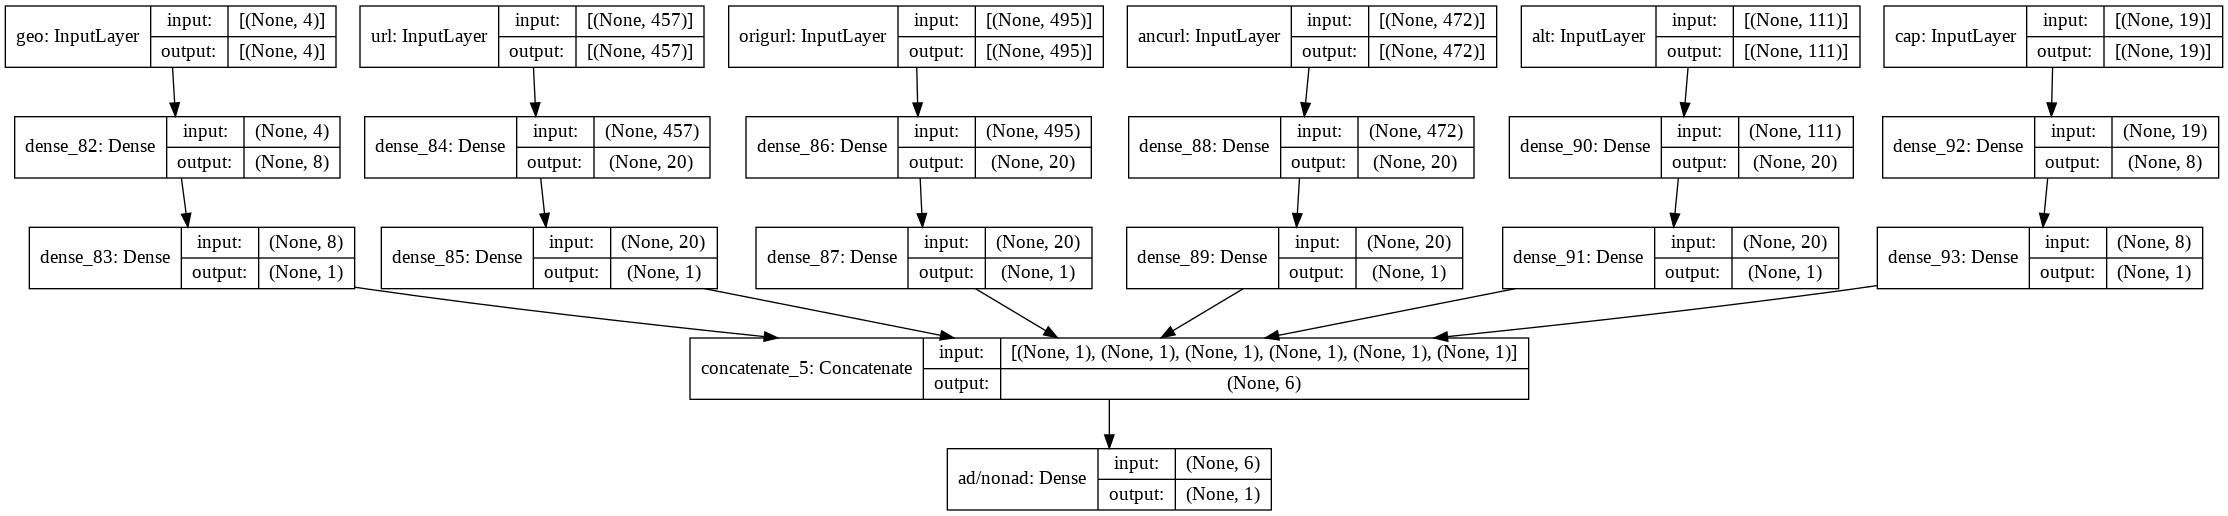

In [ ]:
keras.utils.plot_model(model, "multiModal_skewed_3.png", show_shapes=True)


In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
geo (InputLayer)                [(None, 4)]          0                                            
__________________________________________________________________________________________________
url (InputLayer)                [(None, 457)]        0                                            
__________________________________________________________________________________________________
origurl (InputLayer)            [(None, 495)]        0                                            
__________________________________________________________________________________________________
ancurl (InputLayer)             [(None, 472)]        0                                            
____________________________________________________________________________________________

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
        keras.losses.BinaryCrossentropy(from_logits=True),
        # keras.losses.CategoricalCrossentropy(from_logits=True),
    ],
    metrics=['accuracy'],
    
)

In [ ]:
s='geo_X_test'
print(s.replace("geo","geo"),",")
print(s.replace("geo","url"),",",)
print(s.replace("geo","origurl"),",",)
print(s.replace("geo","ancurl"),",",)
print(s.replace("geo","alt"),",",)
print(s.replace("geo","cap"),"",)

geo_X_test ,
url_X_test ,
origurl_X_test ,
ancurl_X_test ,
alt_X_test ,
cap_X_test 


In [ ]:
model.fit(
    {"geo": geo_X_train, "url": url_X_train ,
      "origurl": origurl_X_train ,
      "ancurl": ancurl_X_train ,
      "alt": alt_X_train ,
      "cap": cap_X_train },
    {"ad/nonad": y_train},
    epochs=200,
    batch_size=64,
    validation_split=0.125,
    verbose=1,

)

Epoch 1/200
36/36 [==============================] - 2s 9ms/step - loss: 0.5010 - accuracy: 0.8646 - val_loss: 0.4314 - val_accuracy: 0.8902
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 0.4501 - accuracy: 0.8587 - val_loss: 0.3897 - val_accuracy: 0.8902
Epoch 3/200
36/36 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.8640 - val_loss: 0.3638 - val_accuracy: 0.8902
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 0.3896 - accuracy: 0.8687 - val_loss: 0.3490 - val_accuracy: 0.8902
Epoch 5/200
36/36 [==============================] - 0s 3ms/step - loss: 0.3741 - accuracy: 0.8712 - val_loss: 0.3387 - val_accuracy: 0.8902
Epoch 6/200
36/36 [==============================] - 0s 3ms/step - loss: 0.3930 - accuracy: 0.8531 - val_loss: 0.3302 - val_accuracy: 0.8902
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 0.3533 - accuracy: 0.8733 - val_loss: 0.3236 - val_accuracy: 0.8902
Epoch 8/200
3

In [ ]:
test_score= model.predict([geo_X_test ,
url_X_test ,
origurl_X_test ,
ancurl_X_test ,
alt_X_test ,
cap_X_test ])

In [ ]:
def custom_f1(y_true, y_pred):
  tn=0
  tp=0
  fn=0
  fp=0    
  for i in range(656):
    # print(y_true[i][0],)
    if y_true[i][0]==0 and y_pred[i][0]==0:
      tn+=1
    if y_true[i][0]==0 and y_pred[i][0]==1:
      fp+=1
    if y_true[i][0]==1 and y_pred[i][0]==0:
      fn+=1
    if y_true[i][0]==1 and y_pred[i][0]==1:
      tp+=1
  print(tn,tp,fn,fp)
  precision=tp/(tp+fp)
  recall=tp/(tp+tn)
  print(recall)
  print(precision)
  print((tp+tn)/(tp+tn+fp+fn))
  return 2*((precision*recall)/(precision+recall))

print(custom_f1(y_test,test_score))

IndexError: ignored

In [ ]:

for i in range(len(test_score)):
  if test_score[i]>=0:
    test_score[i]=1
  else:
    test_score[i]=0

In [ ]:
model.save('multimodal_skewed_6grps.h5')

In [ ]:
y_test=np.reshape(y_test,(656,1))

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
synth_df=pd.read_csv('complete_data.csv')

In [ ]:
X=synth_df.values[:,:-1]
y=synth_df.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [ ]:
geo_X_train=X_train[:,0:4]
geo_X_test=X_test[:,0:4]
url_X_train=X_train[:,4:1428]
url_X_test=X_test[:,4:1428]
alt_X_train=X_train[:,1428:1558]
alt_X_test=X_test[:,1428:1558]

In [ ]:
geo_input=keras.Input(shape=(4,),name='geo')
# geo_x=layers.Dense(16,activation='sigmoid')(geo_input)
geo_x=layers.Dense(8,activation='sigmoid')(geo_input)
geo_output=layers.Dense(1,activation='sigmoid')(geo_x)

In [ ]:
url_input=keras.Input(shape=(1424,),name='url') 
url_x=layers.Dense(320,activation='sigmoid')(url_input)
url_x=layers.Dense(64,activation='sigmoid')(url_x)
url_output=layers.Dense(1,activation='sigmoid')(url_x)

In [ ]:
alt_input=keras.Input(shape=(130,),name='alt') 
alt_x=layers.Dense(64,activation='sigmoid')(alt_input)
alt_x=layers.Dense(20,activation='sigmoid')(alt_x)
alt_output=layers.Dense(1,activation='sigmoid')(alt_x)

In [ ]:
xf1=layers.concatenate([geo_output,url_output,alt_output])
xf1=layers.Dense(2,activation='sigmoid')(xf1)
result=layers.Dense(1, name="ad/nonad")(xf1)

In [ ]:
model=keras.Model(inputs=[geo_input,url_input,alt_input],outputs=[result])

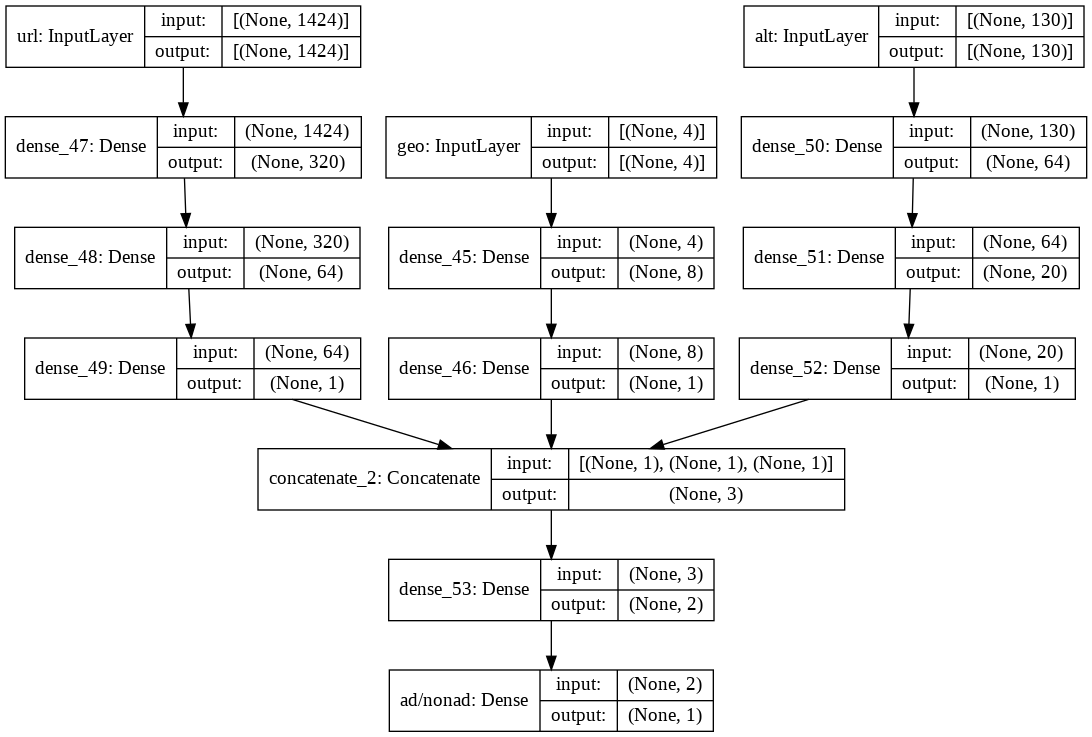

In [ ]:
keras.utils.plot_model(model, "multi_modal_skewed_2.png", show_shapes=True)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
        keras.losses.BinaryCrossentropy(from_logits=True),
        # keras.losses.CategoricalCrossentropy(from_logits=True),
    ],
    metrics=['accuracy'],
    
)

In [ ]:
model.fit(
    {"geo": geo_X_train, "url": url_X_train ,
      "alt": alt_X_train ,
       },
    {"ad/nonad": y_train},
    epochs=400,
    batch_size=64,
    validation_split=0.125,
    verbose=2,

)

Epoch 1/400
36/36 - 2s - loss: 0.5743 - accuracy: 0.1346 - val_loss: 0.5360 - val_accuracy: 0.1098
Epoch 2/400
36/36 - 0s - loss: 0.5295 - accuracy: 0.7381 - val_loss: 0.4968 - val_accuracy: 0.8902
Epoch 3/400
36/36 - 0s - loss: 0.4987 - accuracy: 0.8654 - val_loss: 0.4659 - val_accuracy: 0.8902
Epoch 4/400
36/36 - 0s - loss: 0.4732 - accuracy: 0.8654 - val_loss: 0.4398 - val_accuracy: 0.8902
Epoch 5/400
36/36 - 0s - loss: 0.4530 - accuracy: 0.8654 - val_loss: 0.4186 - val_accuracy: 0.8902
Epoch 6/400
36/36 - 0s - loss: 0.4365 - accuracy: 0.8654 - val_loss: 0.4009 - val_accuracy: 0.8902
Epoch 7/400
36/36 - 0s - loss: 0.4243 - accuracy: 0.8654 - val_loss: 0.3877 - val_accuracy: 0.8902
Epoch 8/400
36/36 - 0s - loss: 0.4150 - accuracy: 0.8654 - val_loss: 0.3771 - val_accuracy: 0.8902
Epoch 9/400
36/36 - 0s - loss: 0.4083 - accuracy: 0.8654 - val_loss: 0.3694 - val_accuracy: 0.8902
Epoch 10/400
36/36 - 0s - loss: 0.4031 - accuracy: 0.8654 - val_loss: 0.3602 - val_accuracy: 0.8902
Epoch 11/

In [ ]:
test_score= model.evaluate([geo_X_test ,
url_X_test ,
alt_X_test  ],y_test,verbose=2)

21/21 - 0s - loss: 0.1331 - accuracy: 0.9634


In [ ]:
y_pred= model.predict([geo_X_test ,
url_X_test ,
alt_X_test  ])

In [ ]:

for i in range(len(y_pred)):
  if y_pred[i][0]>=0:
    y_pred[i]=1
  else:
    y_pred[i]=0

In [ ]:
def custom_f1(y_true, y_pred):
  tn=0
  tp=0
  fn=0
  fp=0    
  for i in range(656):
    print(y_pred[i],)
    if y_true[i]==0 and y_pred[i]==0:
      tn+=1
    if y_true[i]==0 and y_pred[i]==1:
      fp+=1
    if y_true[i]==1 and y_pred[i]==0:
      fn+=1
    if y_true[i]==1 and y_pred[i]==1:
      tp+=1
  print(tn,tp,fn,fp)
  precision=tp/(tp+fp)
  recall=tp/(tp+tn)
  print(recall)
  print(precision)
  print((tp+tn)/(tp+tn+fp+fn))
  return 2*((precision*recall)/(precision+recall))

print(custom_f1(y_test,y_pred))

[1.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]


In [ ]:
model.save('skewed_multi_2.h5')